<a href="https://colab.research.google.com/github/danibosch/mentoria-diplo-datos2021/blob/main/Cintelink_AyVdD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Visualización de Datos 

In [13]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')
# Set float format
pd.set_option('display.float_format','{:.2f}'.format)

# Set style
seaborn.set_style("darkgrid")
seaborn.set_palette('pastel')
seaborn.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
dtypes = {
    "id": "category",
    "id_equipo": "category",
    "id_tanque": "category",
    "volumen": "float32",
    "fuel_level_dmm": "float32",
    "water_level_dmm": "float32",
    "water_volume_lts": "float32",
    "producto": "category",
    "id_empresa": "category",
    "id_canal": "category",
    "capacidad": "float32",
    "alarma": "boolean",
    "temp3": "float32",
    "temp2": "float32",
    "temp1": "float32",
    "temperatura": "float32",
    "coef_var_vol": "float32",
    "density": "float32"
}

In [24]:
# TODO: cargar en git el csv
# TODO: reducir el dataset para test
# filename = '/content/drive/MyDrive/Colab Notebooks/DiploDatos/Mentoría/Datasets/dataset100mil.csv'
filename = '/content/drive/MyDrive/Colab Notebooks/DiploDatos/Mentoría/Datasets/StorageInventory_2021_Q1.csv'
df = pd.read_csv(filename, dtype=dtypes, parse_dates=["timestamp"])

ValueError: ignored

In [ ]:
df.head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
0,0,47936,430,964,17143.94,25.00,N1,67,357,9217.00,0.00,0.00,0,25.00,25.60,23.90,22.30,22.10,36,V61005a1b2e477d,4,1.00,Transportation,50191.00,0.00,Product 1,0.00,nan,2021-01-01 00:00:46
1,1,1906999,477,1014,16200.70,26.10,N1,67,304,15727.00,0.00,0.00,3,26.10,26.10,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.00,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:00:24
2,2,1907000,477,1013,11265.10,25.70,N1,66,297,11579.00,0.00,0.00,2,25.70,-56.60,-56.60,-56.60,-56.60,100,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,VP Diesel,0.00,0.00,2021-01-01 00:00:31
3,3,1907001,477,1010,865.65,24.80,N1,66,302,1865.00,0.00,0.00,0,24.80,25.90,26.00,26.60,-56.60,100,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,VP Nafta,0.00,0.00,2021-01-01 00:00:38
4,4,1907002,477,1011,1929.49,26.00,N1,61,272,3255.00,0.00,0.00,1,26.00,-56.60,-56.60,-56.60,-56.60,100,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,Super,0.00,nan,2021-01-01 00:00:41


In [ ]:
len(df)

83865

In [ ]:
df.dtypes

Unnamed: 0                   int64
id                        category
id_equipo                 category
id_tanque                 category
volumen                    float32
temperatura                float32
codigo                      object
vbat1                        int16
vbat2                        int64
fuel_level_dmm             float32
water_level_dmm            float32
water_volume_lts           float32
producto                  category
temp5                       object
temp4                       object
temp3                      float32
temp2                      float32
temp1                      float32
id_empresa                category
current_firmware            object
id_canal                  category
id_industria              category
industria                   object
capacidad                  float32
alarma                     boolean
nombre_producto             object
coef_var_vol               float32
density                    float32
timestamp           

## Limpieza de datos

### Valores faltantes

In [ ]:
# isnull

In [ ]:
# Volúmenes nulos
nan = numpy.nan
df.query("volumen == @nan")

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp


In [ ]:
# Separamos algunos datos
df['c'] = df['codigo'].apply(lambda x: x[0])
df['echoes'] = df['codigo'].apply(lambda x: x[1]).astype(numpy.int16)

### Eliminación de outliers

In [ ]:
# Veamos si las columnas que deberían ser numéricas tienen datos raros
df['temp5'] = df['temp5'].astype(str)
df[~df['temp5']\
   .str.replace('.', '', 1)\
   .str.replace('-', '', 1)\
   .str.isdigit()
].head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
52,52,142137,421,933,1358.62,29.50,N2,61,298,7726.00,425.00,93.92,0,nan,NaN,nan,nan,nan,210,V60102b7,4,10.00,Telcos,1601.00,1.00,Diesel,0.00,0.00,2021-01-01 00:01:24,N,2
111,111,76809,603,101212,12569.88,24.40,N1,60,255,15326.00,0.00,0.00,0,nan,NaN,nan,nan,nan,63,V60403bQ4830361,4,2.00,Mining,15000.00,1.00,Gasoil,0.00,nan,2021-01-01 00:02:57,N,1
166,166,142138,421,933,1358.20,29.20,N2,61,298,7723.00,424.00,93.70,0,nan,NaN,nan,nan,nan,210,V60102b7,4,10.00,Telcos,1601.00,1.00,Diesel,0.00,0.00,2021-01-01 00:31:49,N,2
167,167,3766965,486,1134,12768.73,31.20,N2,62,260,13085.00,0.00,0.00,0,nan,NaN,nan,nan,nan,275,V60403bQ52db354,7,6.00,Service Station,21000.00,0.00,Infinia Diesel,0.00,0.00,2021-01-01 00:00:09,N,2
168,168,3766966,486,1137,18848.96,33.00,N2,60,251,19271.00,3.00,1.15,1,nan,NaN,nan,nan,nan,275,V60403bQ52db354,7,6.00,Service Station,21000.00,0.00,Diesel 500,0.00,0.00,2021-01-01 00:00:16,N,2


In [ ]:
# Cuáles son esos valores raros
df[~df['temp5']\
   .str.replace('.', '', 1)\
   .str.replace('-', '', 1)\
   .str.isdigit()
]['temp5'].unique()

array(['nan', '02/01/'], dtype=object)

In [ ]:
df['temp4'] = df['temp4'].astype(str)
df[~df['temp4']\
   .str.replace('.', '', 1)\
   .str.replace('-', '', 1)\
   .str.isdigit()
].head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
52,52,142137,421,933,1358.62,29.50,N2,61,298,7726.00,425.00,93.92,0,nan,nan,nan,nan,nan,210,V60102b7,4,10.00,Telcos,1601.00,1.00,Diesel,0.00,0.00,2021-01-01 00:01:24,N,2
111,111,76809,603,101212,12569.88,24.40,N1,60,255,15326.00,0.00,0.00,0,nan,nan,nan,nan,nan,63,V60403bQ4830361,4,2.00,Mining,15000.00,1.00,Gasoil,0.00,nan,2021-01-01 00:02:57,N,1
166,166,142138,421,933,1358.20,29.20,N2,61,298,7723.00,424.00,93.70,0,nan,nan,nan,nan,nan,210,V60102b7,4,10.00,Telcos,1601.00,1.00,Diesel,0.00,0.00,2021-01-01 00:31:49,N,2
167,167,3766965,486,1134,12768.73,31.20,N2,62,260,13085.00,0.00,0.00,0,nan,nan,nan,nan,nan,275,V60403bQ52db354,7,6.00,Service Station,21000.00,0.00,Infinia Diesel,0.00,0.00,2021-01-01 00:00:09,N,2
168,168,3766966,486,1137,18848.96,33.00,N2,60,251,19271.00,3.00,1.15,1,nan,nan,nan,nan,nan,275,V60403bQ52db354,7,6.00,Service Station,21000.00,0.00,Diesel 500,0.00,0.00,2021-01-01 00:00:16,N,2


In [ ]:
# Cuáles son esos valores raros
df[~df['temp4']\
   .str.replace('.', '', 1)\
   .str.replace('-', '', 1)\
   .str.isdigit()
]['temp4'].unique()

array(['nan', '01:00:'], dtype=object)

In [ ]:
# id_industria debería ser int
df['id_industria'] = df['id_industria'].astype(str)
df[~df['id_industria'].str.isdigit()].head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
0,0,47936,430,964,17143.94,25.0,N1,67,357,9217.00,0.00,0.00,0,25.0,25.6,23.90,22.30,22.10,36,V61005a1b2e477d,4,1.0,Transportation,50191.00,0.00,Product 1,0.00,nan,2021-01-01 00:00:46,N,1
1,1,1906999,477,1014,16200.70,26.1,N1,67,304,15727.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:00:24,N,1
2,2,1907000,477,1013,11265.10,25.7,N1,66,297,11579.00,0.00,0.00,2,25.7,-56.6,-56.60,-56.60,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,15032.00,1.00,VP Diesel,0.00,0.00,2021-01-01 00:00:31,N,1
3,3,1907001,477,1010,865.65,24.8,N1,66,302,1865.00,0.00,0.00,0,24.8,25.9,26.00,26.60,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,15032.00,1.00,VP Nafta,0.00,0.00,2021-01-01 00:00:38,N,1
4,4,1907002,477,1011,1929.49,26.0,N1,61,272,3255.00,0.00,0.00,1,26.0,-56.6,-56.60,-56.60,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,15032.00,1.00,Super,0.00,nan,2021-01-01 00:00:41,N,1


In [ ]:
df['temp5'] = pd.to_numeric(df['temp5'], errors='coerce')
df['temp4'] = pd.to_numeric(df['temp4'], errors='coerce')
df['id_industria'] = df['id_industria'].astype(numpy.int64)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
# Volúmenes negativos
df.query("volumen < 0")

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp


In [ ]:
# Volúmenes por encima de la capacidad
df.query("volumen > capacidad")

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
173,173,39589,537,101116,24373.98,25.20,N1,60,298,12818.00,0.00,0.00,0,NaN,NaN,nan,nan,nan,1062,V60403bQb1bdf68,10,1.00,Transportation,21294.00,0.00,Product 1,0.00,nan,2021-01-01 00:00:43
224,224,66511,554,101140,5062.16,27.60,N1,61,241,8862.00,0.00,0.00,0,NaN,NaN,nan,nan,nan,224,V60403bQ4830361,21,0.00,NaN,5000.00,0.00,Product 1,0.00,nan,2021-01-01 00:00:16
226,226,66512,554,101140,5062.16,27.60,N1,61,241,8862.00,0.00,0.00,0,NaN,NaN,nan,nan,nan,224,V60403bQ4830361,21,0.00,NaN,5000.00,0.00,Product 1,0.00,nan,2021-01-01 00:30:41
437,437,39590,537,101116,24371.65,25.20,N1,60,298,12817.00,0.00,0.00,0,NaN,NaN,nan,nan,nan,1062,V60403bQb1bdf68,10,1.00,Transportation,21294.00,0.00,Product 1,0.00,nan,2021-01-01 00:30:09
615,615,39591,537,101116,24373.98,25.20,N1,60,298,12818.00,0.00,0.00,0,NaN,NaN,nan,nan,nan,1062,V60403bQb1bdf68,10,1.00,Transportation,21294.00,0.00,Product 1,0.00,nan,2021-01-01 01:00:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98762,98762,36716,881,102550,53045.80,23.80,M1,67,313,19461.00,0.00,0.00,0,23.80,25.10,27.40,29.90,-56.60,1113,V71005a1d84ff2b,10,1.00,Transportation,50000.00,0.00,Diesel 500,0.00,0.85,2021-01-02 20:01:08
98768,98768,36720,881,102551,55408.26,24.40,M1,66,315,21592.00,0.00,0.00,0,24.40,26.60,-56.60,-56.60,-56.60,1113,V71005a1d84ff2b,10,1.00,Transportation,50000.00,0.00,Diesel 500,0.00,0.85,2021-01-02 20:30:19
98776,98776,36722,881,102550,53045.80,23.70,M1,67,313,19461.00,0.00,0.00,0,23.70,25.10,27.40,30.00,-56.60,1113,V71005a1d84ff2b,10,1.00,Transportation,50000.00,0.00,Diesel 500,0.00,0.85,2021-01-02 20:31:33
99874,99874,45195,729,101779,259.09,27.10,N1,51,352,1215.00,0.00,0.00,0,27.10,-56.20,-56.60,-56.60,-55.70,210,V80604bQ0428b17,4,10.00,Telcos,250.00,1.00,Diesel,0.00,nan,2021-01-02 20:01:26


In [ ]:
# Códigos de error
# Incluyendo Ok o excluyendo error?
ok_codes = ['N', 'L', 'V', 'U', 'P', 'T', 'A', 'I']
df.query("c not in @ok_codes").head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
177,177,111,353,679,21371.00,22.2,F1,60,320,nan,nan,nan,0,nan,nan,nan,nan,nan,195,V4.63.FS,2,7.0,Construction,40000.00,1.00,GASOIL,0.00,0.84,2021-01-01 00:30:00,F,1
291,291,941502,520,102046,0.00,22.9,F0,68,353,0.00,0.00,0.00,4,22.9,22.3,22.30,21.80,22.10,115,V61005a18a2fd18,10,1.0,Transportation,1000.00,0.00,UREA,0.10,1.32,2021-01-01 00:00:26,F,0
346,346,18426,761,101794,0.00,16.3,m0,57,353,0.00,0.00,0.00,0,nan,nan,nan,nan,nan,273,V71107WFe183e3a,10,1.0,Transportation,50000.00,0.00,Product 1,0.00,nan,2021-01-01 00:01:42,m,0
379,379,5221,797,101978,7322.00,22.7,F1,65,353,7322.00,0.00,0.00,1,22.7,23.6,20.40,19.00,-56.60,1099,V71005a151d7f40,2,4.0,Agriculture,15000.00,1.00,Product 2,0.00,nan,2021-01-01 00:00:03,F,1
518,518,345941,216,493,10538.00,23.0,M1,65,363,nan,nan,nan,0,nan,nan,nan,nan,nan,109,V4.42.FS,2,1.0,Transportation,51000.00,1.00,Product 1,0.00,nan,2021-01-01 00:00:00,M,1


In [ ]:
error_codes = ['m', 'M', 'F']
df.query("c in @error_codes").head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
177,177,111,353,679,21371.00,22.2,F1,60,320,nan,nan,nan,0,nan,nan,nan,nan,nan,195,V4.63.FS,2,7.0,Construction,40000.00,1.00,GASOIL,0.00,0.84,2021-01-01 00:30:00,F,1
291,291,941502,520,102046,0.00,22.9,F0,68,353,0.00,0.00,0.00,4,22.9,22.3,22.30,21.80,22.10,115,V61005a18a2fd18,10,1.0,Transportation,1000.00,0.00,UREA,0.10,1.32,2021-01-01 00:00:26,F,0
346,346,18426,761,101794,0.00,16.3,m0,57,353,0.00,0.00,0.00,0,nan,nan,nan,nan,nan,273,V71107WFe183e3a,10,1.0,Transportation,50000.00,0.00,Product 1,0.00,nan,2021-01-01 00:01:42,m,0
379,379,5221,797,101978,7322.00,22.7,F1,65,353,7322.00,0.00,0.00,1,22.7,23.6,20.40,19.00,-56.60,1099,V71005a151d7f40,2,4.0,Agriculture,15000.00,1.00,Product 2,0.00,nan,2021-01-01 00:00:03,F,1
518,518,345941,216,493,10538.00,23.0,M1,65,363,nan,nan,nan,0,nan,nan,nan,nan,nan,109,V4.42.FS,2,1.0,Transportation,51000.00,1.00,Product 1,0.00,nan,2021-01-01 00:00:00,M,1


In [ ]:
# Obtenemos el mismo resultado?
len(df.query("c not in @ok_codes")) == len(df.query("c in @error_codes"))

True

In [ ]:
# Ecos 0
# TODO: Ver cuáles son sondas de presión
# Anotar lo de la sonda de presion temperatura.
PAsar por slack el archivo
# TODO: chequear dif de ecos
df.query("echoes == 0").head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
180,180,163160,400,976,170.40,24.4,N0,18,307,418.00,0.00,0.00,0,nan,nan,nan,nan,nan,230,V50102b8,2,1.0,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 00:01:23,N,0
230,230,53719,175,257,27647.12,27.0,N0,60,199,nan,nan,nan,0,nan,nan,nan,nan,nan,68,V4.38.FS,2,7.0,Construction,50000.00,1.00,Product 1,0.00,nan,2021-01-01 00:00:00,N,0
272,272,345215,106,75,0.00,30.7,N0,0,0,nan,nan,nan,1,nan,nan,nan,nan,nan,28,NaN,2,1.0,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:00:00,N,0
291,291,941502,520,102046,0.00,22.9,F0,68,353,0.00,0.00,0.00,4,22.9,22.3,22.30,21.80,22.10,115,V61005a18a2fd18,10,1.0,Transportation,1000.00,0.00,UREA,0.10,1.32,2021-01-01 00:00:26,F,0
346,346,18426,761,101794,0.00,16.3,m0,57,353,0.00,0.00,0.00,0,nan,nan,nan,nan,nan,273,V71107WFe183e3a,10,1.0,Transportation,50000.00,0.00,Product 1,0.00,nan,2021-01-01 00:01:42,m,0


In [ ]:
# TODO: groupby y chequear min y max de ecos por tanque. Filtrar si algun valor < max

In [ ]:
grouped_history = df.groupby('id_tanque')
grouped_history.get_group(1014).head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,producto,temp5,temp4,temp3,temp2,temp1,id_empresa,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp,c,echoes
1,1,1906999,477,1014,16200.70,26.1,N1,67,304,15727.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:00:24,N,1
5,5,1907003,477,1014,16199.60,26.1,N1,67,304,15726.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:01:23,N,1
9,9,1907007,477,1014,16200.70,26.1,N1,67,304,15727.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:02:22,N,1
13,13,1907011,477,1014,16200.70,26.1,N1,67,304,15727.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:03:21,N,1
17,17,1907015,477,1014,16200.70,26.1,N1,67,304,15727.00,0.00,0.00,3,26.1,26.1,26.60,29.10,-56.60,100,V60603bQ74df1d3,4,6.0,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:04:20,N,1


In [ ]:
grouped_history.groups.keys()

dict_keys([75, 257, 422, 423, 424, 426, 427, 428, 429, 430, 493, 500, 501, 566, 583, 612, 613, 679, 714, 722, 723, 724, 763, 764, 765, 766, 767, 768, 875, 925, 926, 933, 939, 941, 964, 971, 973, 976, 986, 987, 988, 989, 990, 1010, 1011, 1013, 1014, 1027, 1028, 1037, 1046, 1072, 1073, 1087, 1114, 1115, 1116, 1119, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1150, 1180, 101080, 101098, 101099, 101100, 101104, 101113, 101114, 101116, 101121, 101123, 101126, 101134, 101135, 101139, 101140, 101161, 101162, 101163, 101193, 101198, 101199, 101200, 101212, 101213, 101215, 101234, 101246, 101267, 101294, 101301, 101302, 101303, 101305, 101307, 101321, 101322, 101364, 101365, 101367, 101369, 101370, 101390, 101415, 101417, 101418, 101440, 101453, 101454, 101456, 101459, 101460, 101477, 101478, 101487, 101489, 101490, 101503, 101661, 101763, 101775, 101776, 101794, 101813, 101814, 101823, 101825, 101826, 101828, 101841, 101848, 101855, 101864, 101890, 101891, 101936, 101937,

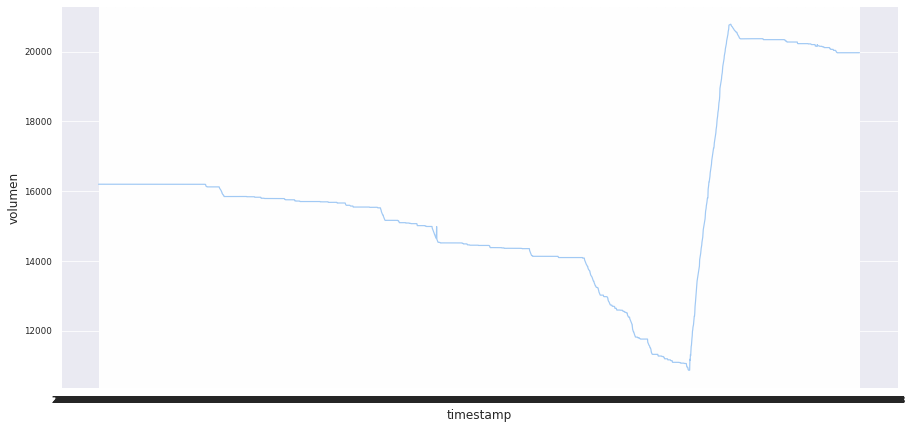

In [ ]:
fig = plt.figure(figsize=(15, 7))
seaborn.lineplot(
    data=grouped_history.get_group(1014), 
    y='volumen', 
    x='timestamp' 
)
plt.ticklabel_format(style='plain', axis='y')
seaborn.despine()

In [ ]:
tanque = grouped_history.get_group(1014)

In [ ]:
# TODO: cheqeuar parámetros
# Probar con derivadas
tanque['moving_avg'] = tanque['volumen'].rolling(window=5, min_periods=1, center=True).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
limit = 0.5
mae = mean_absolute_error(tanque['volumen'], tanque['moving_avg'])
tanque['lower_bond'] = tanque['moving_avg'] - (mae + limit)
tanque['upper_bond'] = tanque['moving_avg'] + (mae + limit)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


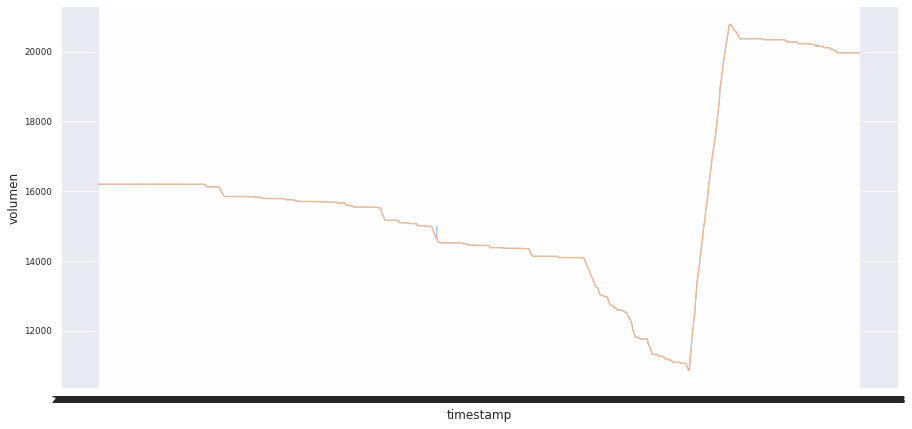

In [ ]:
fig = plt.figure(figsize=(15, 7))
seaborn.lineplot(
    data=tanque, 
    y='volumen', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque, 
    y='moving_avg', 
    x='timestamp' 
)
plt.ticklabel_format(style='plain', axis='y')
seaborn.despine()

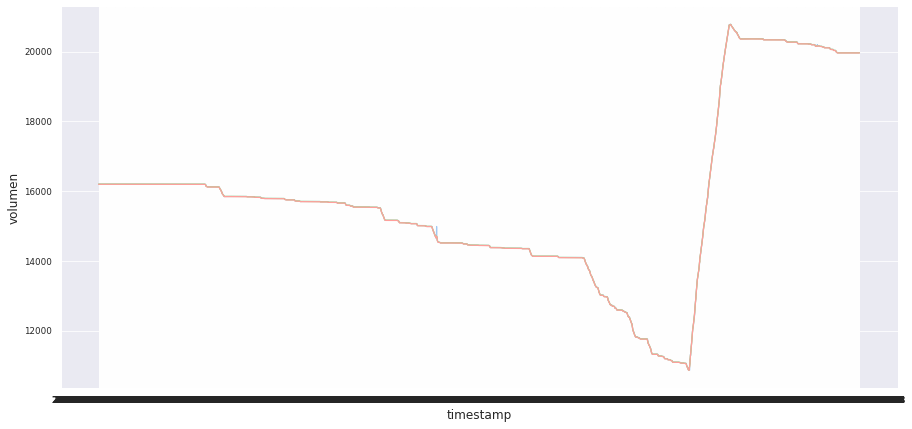

In [ ]:
fig = plt.figure(figsize=(15, 7))
seaborn.lineplot(
    data=tanque, 
    y='volumen', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque, 
    y='moving_avg', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque, 
    y='upper_bond', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque, 
    y='lower_bond', 
    x='timestamp' 
)
plt.ticklabel_format(style='plain', axis='y')
seaborn.despine()

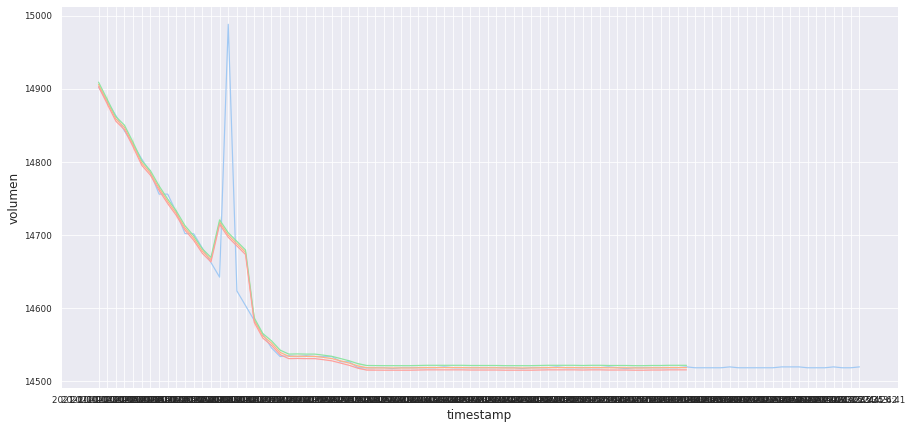

In [ ]:
fig = plt.figure(figsize=(15, 7))
seaborn.lineplot(
    data=tanque[1400:1500], 
    y='volumen', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque[1400:1480], 
    y='moving_avg', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque[1400:1480], 
    y='upper_bond', 
    x='timestamp' 
)
seaborn.lineplot(
    data=tanque[1400:1480], 
    y='lower_bond', 
    x='timestamp' 
)
plt.ticklabel_format(style='plain', axis='y')
seaborn.despine()

### Uniformidad de tiempo de los datos

### Resampling
#### Bfill

In [ ]:
# 10 minutos
tanque_resampled = tanque.resample('10T').bfill()
tanque_resampled

In [ ]:
fig = plt.figure(figsize=(15, 7))
seaborn.lineplot(
    data=tanque_resampled[1400:1500], 
    y='volumen', 
    x='timestamp' 
)
plt.ticklabel_format(style='plain', axis='y')
seaborn.despine()

Ordenar:  
Limpieza
1. Valores faltantes
 - Ver volúmenes nulos si hay
 
2. Outliers
  - Volúmenes negativos (quitar)
  - Volúmenes por encima de la capacidad 
  - Volúmenes no numéricos
  - Tanques con pocos registros
  - Volúmenes que se salen de cierto rango alrededor de la media móvil (intervalos de confianza? porcentajes? ver histogramas?)
  - Registros con códigos de error (definidas en tabla)
  - Registros con ecos 0 (tener en cuenta sondas de presión)
  - Temp5 fuera de rango (idem anterior media movil? intervalos?)
  - vbat1/2 fuera de rango (idem anterior)
  - Capacidades negativas, muy chicas. Ver histograma

3. No se encuentran uniformes
  - Graficar un par donde se vean
  - Calcular diff de tiempos, distribucion.

4. Resample
  - interpolación (lineal? cúbica?)
  - con bfill, etc, mostrar que no está bueno.
  - Interpolación en espacios de tiempo muy largos.

5. Agrupación
  - Tanques

6. Normalizar valores
  - Variación por temperatura?
  - Variación por cantidad de agua?

Análisis
1. Gráfico de centros op seleccionados.
2. Patrones por industria (análisis que hizo Lau)
3. Descriptores estadísticos
  - Medidas de centralización
  - Medidas de dispersión
4. Manejo de inventarios por industria (idem 2?) (Lau) 
5. Correlación de features (analisis de Lau)
6. Derivada primera y derivada segunda
  - Derivada primera nos dice si el líquido sube o baja.
  - Derivada segunda, velocidad de crecimiento/decr? aceleración de crec/decr?
7. Consumo por unidad de tiempo por centro operativo.
  - Suma de diffs negativos absoluto? Quizás sobre media movil. Ver dispersión de media movil
8. Patrones de consumo por industria.
9. Descriptores estadísticos consumo general y por industria.
10. Media móvil de centros operativos por industria.
11. Media móvil de consumos de centros operativos por industria.

Conclusiones: Cómo harían un cálculo simple para estimar inventarios en el corto plazo?.
- Último valor visto.
- Drift (media de últimos valores vistos)
- Última pendiente
- Media movil de últimas pendientes
- última pendiente, y aplicar última aceleración (d' y d'')
- Media movil de últimas pendientes y aplicar mm de última aceleración

===================================

Análisis:
- Autocorrelación (correlacion para series temporales sobre los lags)

Plots:
- Time plot
- Seasonal plot
- Polar plot
- Lag plot (scatter?)

Predicciones naïve:
